In [63]:
import numpy as np
import sympy as smp
from sympy.vector import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec

In [64]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

# Vectors and Geometry

Numerical or symbolic

In [65]:
a = np.array([1,2,3])
b = np.array([7,8,9])
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

## Addition and multiplication

In [66]:
2*a+b

array([ 9, 12, 15])

In [67]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

## Dot products

In [68]:
np.dot(a, b)

50

In [69]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

## Cross products

In [70]:
np.cross(a,b)

array([-6, 12, -6])

In [71]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

## Length of vector

In [72]:
np.linalg.norm(a)

3.7416573867739413

In [73]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

## Vector projection

$\text{proj}_v(u) = \frac{u \cdot v}{|v|^2} v$

In [74]:
proj_b_a = np.dot(a,b)/np.linalg.norm(b)**2 * b
proj_b_a

array([1.80412371, 2.06185567, 2.31958763])

In [75]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

## Lines/Planes in Space

Lines: $\vec{r}(t) = \vec{r}_0 + t\vec{v}$

In [76]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Planes: $\vec{n} \cdot (P_0-\left<x,y,z\right>) = 0$

In [77]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0-r)

-x - y - z + 16

**Examples** Find vector parallel to the line of intersection of the two planes $3x-6y-2z = 15$ and $2x+y-2z=5$. (It's  going to be perpendicular to both normal vectors)

In [78]:
n1 = np.array([-3,6,2])
n2 = np.array([-2,-1,2])
ans = np.cross(n1,n2)
ans

array([14,  2, 15])

# Vector Calculus

## Vector Derivatives

In [79]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [80]:
smp.diff(r,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

Example: Find the angle between the velocity and acceleration as a function of time $\theta(t)$

In [81]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()

In [82]:
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [83]:
theta.subs(t,6)

acos((24 - sin(12)/2)/(sqrt(sin(6)**2 + 4)*sqrt(cos(6)**2 + 153)))

In [84]:
theta.subs(t,6).evalf()

0.251108015692338

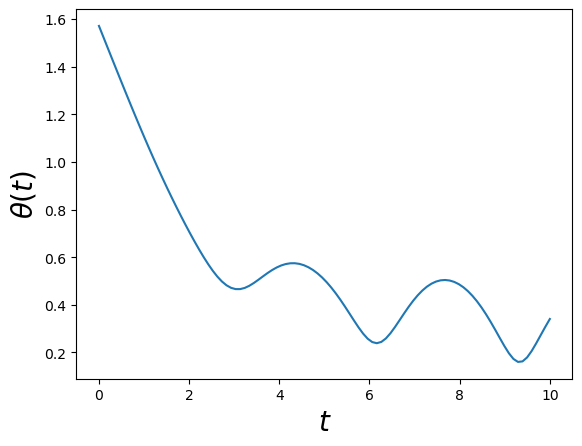

In [85]:
tt = np.linspace(0, 10, 100)
aa = smp.lambdify([t], theta)(tt)
plt.plot(tt,aa)
plt.xlabel('$t$', fontsize=20)
plt.ylabel(r'$\theta(t)$', fontsize=20)
plt.show()

## Vector Integrals

Note: Will not add the +C

In [86]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [87]:
smp.Integral(r)

Integral(Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]]), t)

In [88]:
smp.Integral(r).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In some cases integral cannot be evaluated symbolically: must solve definite integrals numerically:

In [89]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

Integrate from $t=0$ to $t=4$

In [90]:
r_num = smp.lambdify([t], r)

In [91]:
r_num = smp.lambdify([t], r)
quad_vec(r_num, 0, 4)[0]

array([[-4.83559254e+05],
       [ 9.06402477e-01],
       [ 6.70972506e-01]])

## Arclength

$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Rare Cases can be done symbolically. Find arclength of $\left< 0, t, t^2 \right>$ from $t=0$ to $t=1$

In [92]:
r = smp.Matrix([0, t, t**2])
smp.integrate(smp.diff(r,t).norm(), (t,0,1))

asinh(2)/4 + sqrt(5)/2

In most cases needs to be done numerically. Find arclength of $\left< e^t, \sin(t), t^4 \right>$ from $t=0$ to $t=1$

In [93]:
r = smp.Matrix([smp.exp(t), smp.sin(t), t**4])
r_num = smp.lambdify([t], smp.diff(r,t).norm())
quad(r_num, 0, 1)[0]

2.316977146444862

## Other Relavent Quantities

If $ds = \sqrt{dx^2 + dy^2 + dz^2}$ is the arclength element $ds/dt = \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } = |d\vec{r}/dt| = |\vec{v}|$ then the other quantities of importance are

* Unit Tangent vector: $\vec{T} = \frac{d\vec{r}}{dt}\frac{1}{|d\vec{r}/dt|} = \vec{v}/|\vec{v}|$ 
* Curvature: $\kappa = |\frac{d\vec{T}}{dt}|\frac{1}{|\vec{v}|}$
* Unit normal vector to Curve: $\vec{N} = \frac{d\vec{T}/dt}{|d\vec{T}/dt|}$

**Example** Find all these for $\vec{r}(t) = \left<a\cos(t)e^t, b\sin(t), ct\right>$

In [94]:
t, a, b, c = smp.symbols('t a b c', pos=True, real=True)

Define the path

In [95]:
r = smp.Matrix([a*smp.cos(t)*smp.exp(t), b*smp.sin(t), c*t])
r

Matrix([
[a*exp(t)*cos(t)],
[       b*sin(t)],
[            c*t]])

Define the velocity vector $\vec{v}$ and speed $|\vec{v}|$

In [96]:
v = smp.diff(r, t)
v_norm = v.norm()

Get $\vec{T}$, $\kappa$, and $\vec{N}$

In [97]:
T = v/v_norm
kappa = smp.diff(T, t).norm()/v_norm
N = smp.diff(T,t)/smp.diff(T,t).norm()

Can evaluate these quantities or make plots

In [98]:
kappa.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()

0.00775458595406284

In [99]:
N.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()

Matrix([
[-0.152946073876551],
[-0.204518432770271],
[-0.966840063890063]])

Can also make continuous plots

In [100]:
kappa_num = smp.lambdify([t,a,b,c], kappa)

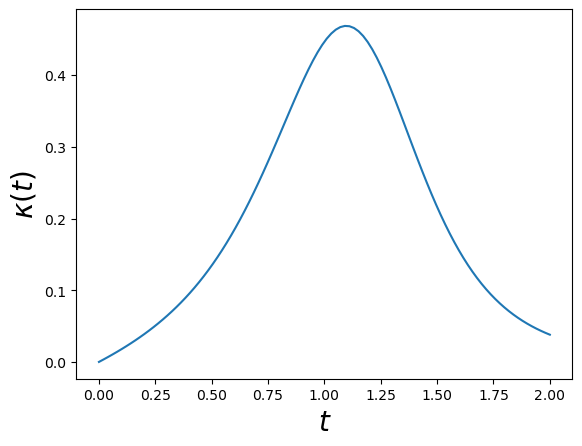

In [101]:
tt = np.linspace(0, 2, 100)
kk = kappa_num(tt, 1, 2, 3)
plt.plot(tt, kk)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$\kappa(t)$', fontsize=20)
plt.show()

# Partial/Directional Derivatives

In [102]:
x, y, z = smp.symbols('x y z')

## Basics

Partial Derivatives $\partial f / \partial x$ and $\partial f / \partial y$ of $f(x,y)=y^2\sin(x+y)$

In [103]:
f = y**2 * smp.sin(x+y)
smp.diff(f,x)

y**2*cos(x + y)

In [104]:
smp.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

Or more complicated things like $\frac{\partial^3 f}{\partial xy^2}$

In [105]:
smp.diff(f,y,y,x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

## The Chain Rule

In [106]:
t = smp.symbols('t')
x, y, z, w, v =smp.symbols('x, y, z w v', cls=smp.Function)

* Suppose $x$, $y$, and $z$ are functions of $t$ 
* $w$ is a function of $x$, $y$, and $z$. i.e $w=w(x,y,z)$

Find $dw/dt$

In [107]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

Can keep things in a more functional form:

In [108]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Or put in specific functions:

In [109]:
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

## Gradients

Gradients: $\nabla f$. Now we are dealing with particular coordinate systems, so we must be careful:

In [110]:
C = CoordSys3D('')

In [111]:
f = C.x*smp.sin(C.y)
gradient(f)

(sin(.y))*.i + (.x*cos(.y))*.j

In [112]:
gradient(f).to_matrix(C)

Matrix([
[   sin(.y)],
[.x*cos(.y)],
[         0]])

In [113]:
gradient(f).to_matrix(C).subs([(C.y, 1)])

Matrix([
[   sin(1)],
[.x*cos(1)],
[        0]])

## Directional Derivatives

Directional derivatives $D_u f = \nabla f \cdot u$

In [114]:
u = 4*C.i - 3*C.j + 2*C.k
# Make into unit vector
u = u.normalize()
u

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

In [115]:
gradient(f).dot(u)

-3*sqrt(29)*.x*cos(.y)/29 + 4*sqrt(29)*sin(.y)/29

## Extreme Values and Saddle Points

Extreme values of $f(x,y)$ can occur at

* 1. Boundary points of the domain of $f$
* 2. Critical Points ($f_x=f_y=0$)

If

* (i) $f_{xx}<0$ and $f_{xx}f_{yy} - f_{xy}^2>0$ at (a,b) then **local maximum**
* (ii) $f_{xx}>0$ and $f_{xx}f_{yy} - f_{xy}^2>0$ at (a,b) then **local minimum**
* (iii) $f_{xx}f_{yy} - f_{xy}^2 < 0$ at (a,b) then **saddle point**
* (iv) $f_{xx}f_{yy} - f_{xy}^2 = 0$ at (a,b) then **inconclusive**

In [116]:
x, y = smp.symbols('x y', real=True)
f = x**3 + 3*x*y + y**3
f

x**3 + 3*x*y + y**3

In [117]:
smp.solve([smp.diff(f,x), smp.diff(f, y)])

[{x: -1, y: -1}, {x: 0, y: 0}]

In [118]:
fxx = smp.diff(f,x,x)
fyy = smp.diff(f,y,y)
fxy = smp.diff(f,x,y)

Testing the first point

In [119]:
fxx.subs([(x,-1),(y,-1)])

-6

In [120]:
test = fxx*fyy-fxy**2
test.subs([(x,-1),(y,-1)])

27

Thus the first point is a local maximum!

## Lagrange Multipliers

Minimize $f(x,y,z)$ subject to the constraint $g(x,y,z)=0$

* Requires solving the two equations $\nabla f = \lambda \nabla g$ and $g(x,y,z)=0$

**Example**: A space probe has the shape of an ellipsoid $4x^2 + y^2 + 4z^2 = 16$ and after sitting in the sun for an hour. the temperature on its surface is given by $T(x,y,z)=8x^2+4yz-16z+600$. Find the hottest point on the surface

Note that $g=4x^2 + y^2 + 4z^2 - 16 = 0$ and $f=T = 8x^2+4yz-16z+600$ here

In [121]:
C = CoordSys3D('')

In [125]:
lam = smp.symbols('\lambda')
g = 4*C.x**2 + C.y**2 + 4*C.z**2 - 16
f = 8*C.x**2 + 4*C.y*C.z-16*C.z+600
eq1 = gradient(f)-lam*gradient(g)
eq1 = eq1.to_matrix(C)
eq2 = g
sols = smp.solve([eq1, eq2])
sols

[{\lambda: 2, .x: -4/3, .y: -4/3, .z: -4/3},
 {\lambda: sqrt(3), .x: 0, .y: -2, .z: -sqrt(3)},
 {\lambda: -sqrt(3), .x: 0, .y: -2, .z: sqrt(3)},
 {\lambda: 0, .x: 0, .y: 4, .z: 0},
 {\lambda: 2, .x: 4/3, .y: -4/3, .z: -4/3}]

In [126]:
for sol in sols:
    print(f.subs(sol).evalf())

642.666666666667
641.569219381653
558.430780618347
600.000000000000
642.666666666667


First and last solutions are the points where the probe is the hottest.

# Multiple Integrals

In rare cases these can be done symbolically:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xdzdydx$$

In [ ]:
x, y, z = smp.symbols('x, y, z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

But most of the time they need to be done numerically, such as in this example:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xe^{-y}\cos(z)dzdydx$$

In [ ]:
# Wont Run!!
#x, y, z = smp.symbols('x, y, z')
#f = x*smp.exp(-y)*smp.cos(z)
#smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

Use scipy to evaluate this numerically

In [ ]:
from scipy.integrate import tplquad
f = lambda z, y, x: x*np.exp(-y)*np.cos(z)
tplquad(f, 0, 1,
        lambda x: 0, lambda x: 1-x**2,
        lambda x, y: 3, lambda x, y: 4-x**2-y**2)[0]

# Integrals and Vector Fields

## Line Integrals (Scalar)

Given $\vec{r}(t) = \left< g(t), h(t), k(t) \right>$ the line integral of $f(x,y,z)$ along the curve is

$$\int_C f(x,y,z) ds = \int_a^b f(g(t), h(t), k(t))|d\vec{r}/dt|dt$$

In [ ]:
t = smp.symbols('t', real=True)
x, y, z, f = smp.symbols('x y z f', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = smp.Matrix([x, y, z])
f = f(x,y,z)

In [ ]:
integrand = f*smp.diff(r,t).norm()
integrand

Suppose 
* $\vec{r}(t) = \left<\cos(t), \sin(t), t \right>$ 
* $f(x,y,z)=2xy+\sqrt{z}$ 

and we are going from $t=0$ to $t=2\pi$. In this case it can be solved symbolically:

In [ ]:
integrand1 = integrand.subs([(f, 2*x*y+smp.sqrt(z)),
                            (x, smp.cos(t)),
                            (y, smp.sin(t)),
                            (z, t)]).doit().simplify()
smp.integrate(integrand1, (t, 0, 2*smp.pi))

In general, can't be done symbolically. Consider now

* $\vec{r}(t) = \left<3\cos(t), 2\sin(t), e^{t/4} \right>$ 
* $f(x,y,z)=2xy+\sqrt{z}$ 

and we are going from $t=0$ to $t=2\pi$.

In [ ]:
integrand2 = integrand.subs([(f, 2*x*y+smp.sqrt(z)),
                            (x, 3*smp.cos(t)),
                            (y, smp.sin(t)),
                            (z, smp.exp(t/4))]).doit().simplify()
# Won't Run!
#smp.integrate(integrand2, (t, 0, 2*smp.pi))

In [ ]:
integrand2

Do it numerically using scipy's `quad` function

In [ ]:
integrand2_num = smp.lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

## Line Integrals (Vector)

Given $\vec{r}(t) = \left< g(t), h(t), k(t) \right>$ the line integral of $\vec{F}(x,y,z)$ along the curve is

$$\int_C \vec{F}(x,y,z) \cdot d\vec{r} = \int_a^b\vec{F}(g(t), h(t), k(t)) \cdot \frac{d\vec{r}}{dt} dt$$

In [ ]:
t = smp.symbols('t', real=True)
x, y, z, F1, F2, F3 = smp.symbols('x y z F_1, F_2, F_3', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
F1 = F1(x,y,z)
F2 = F2(x,y,z)
F3 = F3(x,y,z)
r = smp.Matrix([x, y, z])
F = smp.Matrix([F1, F2, F3])

In [ ]:
integrand = F.dot(smp.diff(r,t))
integrand

Suppose $\vec{F} = \left< \sqrt{z}, -2x, \sqrt{y}\right>$ and $\vec{r}(t) = \left<t, t^2, t^4 \right>$ from $t=0$ to $t=1$

In [ ]:
integrand1 = integrand.subs([(F1, smp.sqrt(z)),
                             (F2, -2*x),
                             (F3, smp.sqrt(y)),
                             (x, t),
                             (y, t**2),
                             (z, t**4)]).doit().simplify()
smp.integrate(integrand1, (t, 0, 1))

Often times this can't be done by hand, and one needs to evaluate numerically using scipy:

Suppose $\vec{F} = \left< \sqrt{|z|}, -2x, \sqrt{|y|}\right>$ and $\vec{r}(t) = \left<3\cos^2(t), t^2, 2\sin(t) \right>$ from $t=0$ to $t=2\pi$

In [ ]:
integrand2 = integrand.subs([(F1, smp.sqrt(smp.Abs(z))),
                             (F2, -2*x),
                             (F3, smp.sqrt(smp.Abs(y))),
                             (x, 3*smp.cos(t)**2),
                             (y, t**2),
                             (z, 2*smp.sin(t))]).doit().simplify()
# Won't Run
#smp.integrate(integrand2, (t, 0, 2*smp.pi))

In [ ]:
integrand2

Do it numerically using scipy's `quad` function

In [ ]:
integrand2_num = smp.lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

## Surface Integrals (Scalar)

Area of a surface parameterized by $\vec{r}(u,v)$ is given by 

$$A = \iint_S \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv$$

The surface integral of a scalar function $G(\vec{r})$ is given by

$$\iint_S G(\vec{r}(u,v)) \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv$$

2D parabola: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$. Suppose the surface density is given by $G(x,y,z)=x^2+y^2$. Find surface integral for $0<\rho<1$ and $0<\theta<2\pi$

In [ ]:
rho, the = smp.symbols(r'\rho \theta',pos=True, real=True)
x, y, z, G = smp.symbols('x y z G', cls=smp.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G = G(x,y,z)
r = smp.Matrix([x, y, z])

In [ ]:
integrand = G*smp.diff(r,rho).cross(smp.diff(r,the)).norm()
integrand

In [ ]:
integrand1 = integrand.subs([(G, x**2+y**2),
                             (x, rho*smp.cos(the)),
                             (y, rho*smp.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

In [ ]:
smp.integrate(integrand1, (the, 0, 2*smp.pi), (rho, 0, 1))

As before, if this integral can't be done symbolically, need to use scipy to convert to numerical function.

## Surface Integrals (Vector)

The surface integral of a vector function $\vec{G}(\vec{r})$ is given by

$$\iint_S \vec{G}(\vec{r}(u,v)) \cdot \left(\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv}\right) du dv$$

This is also know as the flux of the vector field $\vec{G}$ through the surface

2D parabola: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$. Suppose a vector field is given by $\vec{G}(x,y,z)=\left<y^2, z, 0 \right>$. Find the flux of $\vec{G}$ through half the surface for $0<\rho<1$ and $0<\theta<\pi$

In [ ]:
rho, the = smp.symbols(r'\rho \theta',pos=True, real=True)
x, y, z, G1, G2, G3 = smp.symbols('x y z G_1, G_2, G_3', cls=smp.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G1 = G1(x,y,z)
G2 = G2(x,y,z)
G3 = G3(x,y,z)
r = smp.Matrix([x, y, z])
G = smp.Matrix([G1, G2, G3])

In [ ]:
integrand = G.dot(smp.diff(r,rho).cross(smp.diff(r,the)))
integrand

In [ ]:
integrand1 = integrand.subs([(G1, y**2),
                             (G2, z),
                             (G3, 0),
                             (x, rho*smp.cos(the)),
                             (y, rho*smp.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

In [ ]:
smp.integrate(integrand1, (the, 0, smp.pi), (rho, 0, 1))

Again, if this could not be done symbolically, one would need to convert the integrand into a numpy function and integrate using scipys `quad` function, like in previous examples.

## Explicit Sympy Functionality

In [ ]:
from sympy.vector import ParametricRegion

Find the mass of a cylinder with radius $a$ and height $h$ centered at origin with density $\rho(x,y)=x^2+y^2$

In [ ]:
a, h, r, the, z = smp.symbols(r'a h r \theta z', positive=True)
cylinder = ParametricRegion((r*smp.cos(the), r*smp.sin(the), z),
                    (the, 0, 2*smp.pi), (z, 0, h), (r, 0, a))
vector_integrate(C.x**2 + C.y**2, cylinder)

Not necessarily a fan of this functionailty because there is no clear way of converting it into an numerical function if it cannot be computed symbolically. For more see

https://docs.sympy.org/latest/modules/vector/vector_integration.html